In [ ]:
!pip install pycaret

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/meteorological_models/distan_lat42.3394lon-8.8339p10R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance',
                          color_continuous_scale=px.colors.cyclical.IceFire,)

In [2]:
coor.drop(columns=["Unnamed: 0"])

,lat,lon,lat_st,lon_st,distance
0,42.335400,-8.830873,42.3394,-8.8339,0.509
1,42.347363,-8.829857,42.3394,-8.8339,0.945
2,42.336150,-8.847057,42.3394,-8.8339,1.139
3,42.348114,-8.846044,42.3394,-8.8339,1.390
4,42.334650,-8.814690,42.3394,-8.8339,1.664
5,42.323437,-8.831889,42.3394,-8.8339,1.782
6,42.346610,-8.813670,42.3394,-8.8339,1.845
7,42.324190,-8.848070,42.3394,-8.8339,2.052
8,42.359325,-8.828840,42.3394,-8.8339,2.253
9,42.322685,-8.815709,42.3394,-8.8339,2.384


**Observed data**

In [2]:
#station dir variable variable every 10 minutes º
station_raw = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/meteorological_stations/ria_enm_windplus.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")

# options statistics dir(station_raw.resample("H",label="right",closed="right"))

#resample mean direction hour before (T-1,T]
station = station_raw.resample("H",label="right",closed="right").mean().dropna()
station.describe()

,spd_udr,spd_san,spd_mar,spd_cor,spd_ons,dir_cor,dir_mar,dir_udr,dir_ons,dir_san,...,dird_cor,dird_mar,dird_udr,dird_ons,dird_san,guss_cor,guss_mar,guss_udr,guss_ons,guss_san
count,7502.000000,7502.000000,7502.000000,7502.000000,7502.000000,7502.000000,7502.000000,7502.000000,7502.000000,7502.000000,...,7502.000000,7502.000000,7502.000000,7502.000000,7502.000000,7502.000000,7502.000000,7502.000000,7502.000000,7502.000000
mean,14.680810,4.781098,8.976776,16.377011,18.138930,133.648894,155.118886,149.553390,163.861295,173.694577,...,9.507778,19.585637,11.609517,11.752390,25.744888,22.290372,15.423472,20.554791,25.523460,11.168217
std,10.384120,3.694043,6.329109,10.743121,9.427310,91.764705,88.307387,103.535028,109.755244,93.798952,...,5.210311,7.393672,5.805649,6.290748,10.602160,13.658307,10.172552,13.033487,13.069257,7.793431
min,0.283333,0.000000,0.183333,0.100000,1.166667,2.166667,3.500000,2.000000,0.333333,0.000000,...,0.000000,3.000000,1.166667,1.333333,0.000000,0.533333,0.900000,0.733333,2.866667,0.000000
25%,7.216667,1.716667,3.833333,7.433333,11.000000,47.666667,67.500000,52.500000,45.000000,93.000000,...,5.333333,14.500000,7.333333,7.666667,18.833333,10.800000,7.200000,10.983333,15.150000,4.633333
50%,11.650000,3.850000,7.683333,14.666667,16.316667,101.416667,176.333333,165.250000,171.166667,181.500000,...,8.333333,17.666667,11.000000,9.833333,26.166667,20.308333,13.258333,17.116667,23.533333,9.400000
75%,19.150000,7.250000,12.733333,23.962500,24.383333,215.166667,229.833333,217.833333,276.000000,236.791667,...,12.666667,23.333333,13.833333,13.333333,32.333333,32.100000,21.366667,26.883333,34.066667,16.150000
max,67.483333,25.066667,50.083333,56.950000,54.100000,353.000000,355.500000,357.166667,357.666667,355.000000,...,49.500000,75.000000,57.500000,55.333333,70.166667,69.083333,79.950000,84.700000,77.983333,49.483333


In [3]:
#dir udr to interval
interval=pd.IntervalIndex.from_tuples([(-0.5,20), (20, 40), (40, 60),
                                       (60,80),(80,100),(100,120),(120,140),(140,160),
                                       (160,180),(180,200),(200,220),(220,240),
                                       (240,260),(260,280),(280,300),(300,320),
                                       (320,340),(340,360)])
labels=['[0, 20]', '(20, 40]', '(40, 60]','(60, 80]', '(80, 100]', '(100, 120]',
        '(120, 140]','(140, 160]', '(160, 180]', '(180, 200]', '(200, 220]',
        '(220, 240]', '(240, 260]', '(260, 280]', '(280, 300]','(300, 320]',
        '(320, 340]', '(340, 360]']
station["dir_udr_l"]=pd.cut(station["dir_udr"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

# put var when dird>=20
station.loc[station['dird_udr'] >= 20, 'dir_udr_l'] = "variable"
station[["dir_udr_l","dir_udr","dird_udr","spd_udr"]].sample(15)


,dir_udr_l,dir_udr,dird_udr,spd_udr
time,,,,
2021-04-15 08:00:00,"(20, 40]",29.500000,11.833333,15.983333
2021-05-06 13:00:00,"(180, 200]",197.500000,4.666667,26.816667
2021-06-07 23:00:00,"(180, 200]",180.333333,14.666667,4.766667
2021-04-03 13:00:00,"(100, 120]",120.000000,18.000000,6.233333
2021-07-30 21:00:00,"[0, 20]",10.666667,9.500000,22.600000
2021-09-28 16:00:00,"(320, 340]",323.666667,4.333333,16.466667
2021-03-15 23:00:00,"(20, 40]",28.833333,15.833333,11.250000
2021-04-11 21:00:00,"(20, 40]",38.833333,15.166667,27.916667
2021-12-20 04:00:00,"(80, 100]",94.666667,19.666667,8.900000


**Forecast d0**

In [4]:
#ria forecast d0 (4 Km spatial resolution)
ria_model1k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/meteorological_models/lat42.3394lon-8.8339p10R1KmD0.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
ria_model1k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape9,cin9,cfh9,cfl9,cfm9,cft9,HGT5009,HGT8509,T5009,T8509
time,,,,,,,,,,,,,,,,,,,,,
2021-03-11 01:00:00,186.273773,0.0,1896.026123,6.773557,8.998179,102346.867188,286.413910,0.946439,24232.851562,6.475882,...,11.689000,-6.945863,0.594799,0.4000,0.0,0.594799,5701.129395,1534.721313,259.192383,278.500885
2021-03-11 02:00:00,193.731506,0.0,1874.094604,8.317129,10.699698,102329.054688,286.432709,0.952505,24230.583984,5.936164,...,20.549000,-7.235113,0.606415,0.5000,0.0,0.606415,5695.271973,1532.561890,258.940674,278.303558
2021-03-11 03:00:00,192.957199,0.0,1800.533691,7.980715,9.973078,102276.859375,286.428589,0.962512,24228.480469,2.343284,...,35.082001,-5.083781,0.400000,0.6875,0.0,0.687500,5684.012695,1527.391357,258.859253,277.616302
2021-03-11 04:00:00,204.990555,0.0,1785.374268,7.176606,10.237475,102299.726562,286.521606,0.952493,24228.626953,3.224807,...,40.749001,0.000063,0.200000,0.5000,0.0,0.500000,5677.551758,1527.901001,258.952240,277.386871
2021-03-11 05:00:00,207.670486,0.0,1832.706665,7.587302,10.244191,102316.382812,286.618896,0.938688,24227.371094,5.942581,...,49.945000,-1.819898,0.300000,0.5000,0.0,0.500000,5671.853027,1527.516235,258.849823,277.943512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19 19:00:00,34.582340,0.0,1806.416870,2.094536,2.890469,103191.406250,284.837860,0.757432,24135.000000,7.534368,...,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,5703.036621,1606.335938,252.133316,279.323761
2022-01-19 20:00:00,29.389811,0.0,1789.401855,2.272455,3.252196,103125.890625,284.552307,0.760464,24135.000000,8.583035,...,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,5703.353516,1606.324341,251.896622,279.380188
2022-01-19 21:00:00,16.122416,0.0,1800.975342,3.841519,4.721776,103253.632812,284.818695,0.679931,24135.000000,27.878992,...,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,5709.435059,1613.704346,251.719131,279.538818


In [5]:
#label meteorological variable
interval=pd.IntervalIndex.from_tuples([(-0.5,20), (20, 40), (40, 60),
                                       (60,80),(80,100),(100,120),(120,140),(140,160),
                                       (160,180),(180,200),(200,220),(220,240),
                                       (240,260),(260,280),(280,300),(300,320),
                                       (320,340),(340,360)])
labels=['[0, 20]', '(20, 40]', '(40, 60]','(60, 80]', '(80, 100]', '(100, 120]',
        '(120, 140]','(140, 160]', '(160, 180]', '(180, 200]', '(200, 220]',
        '(220, 240]', '(240, 260]', '(260, 280]', '(280, 300]','(300, 320]',
        '(320, 340]', '(340, 360]']
ria_model1k["dir0_l"]=pd.cut(ria_model1k["dir0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str) 
ria_model1k[["dir0_l","dir0"]].sample(20)


,dir0_l,dir0
time,,
2021-08-24 18:00:00,"(320, 340]",337.742218
2021-08-28 19:00:00,"(180, 200]",194.516144
2021-09-25 21:00:00,"(180, 200]",185.611237
2021-06-24 14:00:00,"(300, 320]",306.850128
2021-04-29 16:00:00,"(320, 340]",324.945526
2021-11-15 10:00:00,"(20, 40]",28.954126
2021-07-08 05:00:00,"(20, 40]",26.186888
2021-04-05 21:00:00,"[0, 20]",3.726633
2021-07-24 03:00:00,"(160, 180]",162.242645


In [8]:
#merge meteorological model and station

df_all1k = pd.concat([station["dir_udr_l"],ria_model1k],axis=1).dropna()
df_all1k

,dir_udr_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cin9,cfh9,cfl9,cfm9,cft9,HGT5009,HGT8509,T5009,T8509,dir0_l
time,,,,,,,,,,,,,,,,,,,,,
2021-03-11 01:00:00,"(180, 200]",186.273773,0.0,1896.026123,6.773557,8.998179,102346.867188,286.413910,0.946439,24232.851562,...,-6.945863,0.594799,0.4000,0.0,0.594799,5701.129395,1534.721313,259.192383,278.500885,"(180, 200]"
2021-03-11 02:00:00,"(180, 200]",193.731506,0.0,1874.094604,8.317129,10.699698,102329.054688,286.432709,0.952505,24230.583984,...,-7.235113,0.606415,0.5000,0.0,0.606415,5695.271973,1532.561890,258.940674,278.303558,"(180, 200]"
2021-03-11 03:00:00,"(180, 200]",192.957199,0.0,1800.533691,7.980715,9.973078,102276.859375,286.428589,0.962512,24228.480469,...,-5.083781,0.400000,0.6875,0.0,0.687500,5684.012695,1527.391357,258.859253,277.616302,"(180, 200]"
2021-03-11 04:00:00,"(180, 200]",204.990555,0.0,1785.374268,7.176606,10.237475,102299.726562,286.521606,0.952493,24228.626953,...,0.000063,0.200000,0.5000,0.0,0.500000,5677.551758,1527.901001,258.952240,277.386871,"(200, 220]"
2021-03-11 05:00:00,"(180, 200]",207.670486,0.0,1832.706665,7.587302,10.244191,102316.382812,286.618896,0.938688,24227.371094,...,-1.819898,0.300000,0.5000,0.0,0.500000,5671.853027,1527.516235,258.849823,277.943512,"(200, 220]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19 19:00:00,variable,34.582340,0.0,1806.416870,2.094536,2.890469,103191.406250,284.837860,0.757432,24135.000000,...,0.000000,0.000000,0.0000,0.0,0.000000,5703.036621,1606.335938,252.133316,279.323761,"(20, 40]"
2022-01-19 20:00:00,"(60, 80]",29.389811,0.0,1789.401855,2.272455,3.252196,103125.890625,284.552307,0.760464,24135.000000,...,0.000000,0.000000,0.0000,0.0,0.000000,5703.353516,1606.324341,251.896622,279.380188,"(20, 40]"
2022-01-19 21:00:00,"(60, 80]",16.122416,0.0,1800.975342,3.841519,4.721776,103253.632812,284.818695,0.679931,24135.000000,...,0.000000,0.000000,0.0000,0.0,0.000000,5709.435059,1613.704346,251.719131,279.538818,"[0, 20]"


In [9]:
df_all1k[["dir0_l","dir0","dir_udr_l"]]

,dir0_l,dir0,dir_udr_l
time,,,
2021-03-11 01:00:00,"(180, 200]",186.273773,"(180, 200]"
2021-03-11 02:00:00,"(180, 200]",193.731506,"(180, 200]"
2021-03-11 03:00:00,"(180, 200]",192.957199,"(180, 200]"
2021-03-11 04:00:00,"(200, 220]",204.990555,"(180, 200]"
2021-03-11 05:00:00,"(200, 220]",207.670486,"(180, 200]"
...,...,...,...
2022-01-19 19:00:00,"(20, 40]",34.582340,variable
2022-01-19 20:00:00,"(20, 40]",29.389811,"(60, 80]"
2022-01-19 21:00:00,"[0, 20]",16.122416,"(60, 80]"


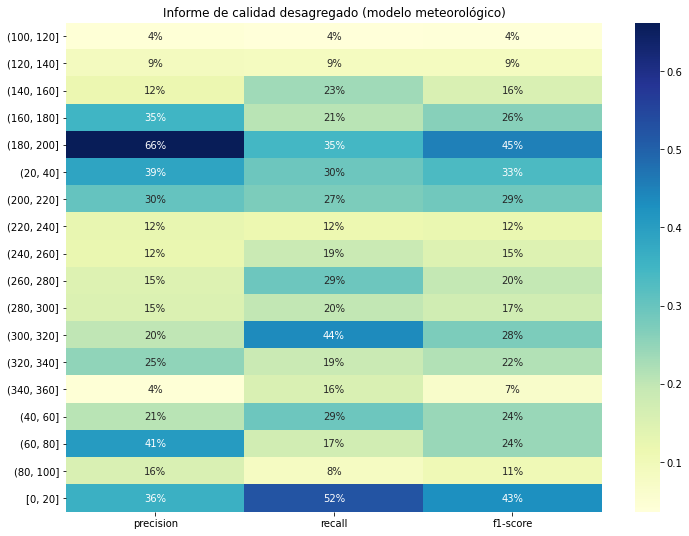

In [10]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Informe de calidad desagregado (modelo meteorológico)")

df_novar = df_all1k.drop(df_all1k[df_all1k.dir_udr_l == "variable" ].index)
cr = pd.DataFrame(classification_report(df_novar.dir_udr_l, df_novar.dir0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


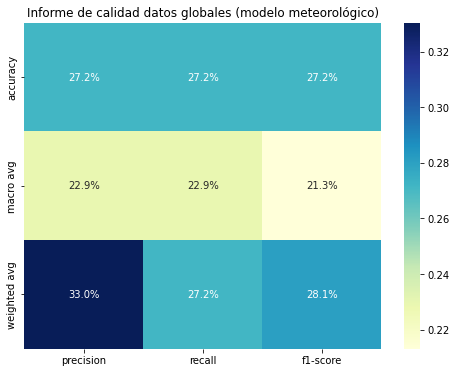

In [11]:
plt.figure(figsize=(8, 6))
plt.title("Informe de calidad datos globales (modelo meteorológico)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

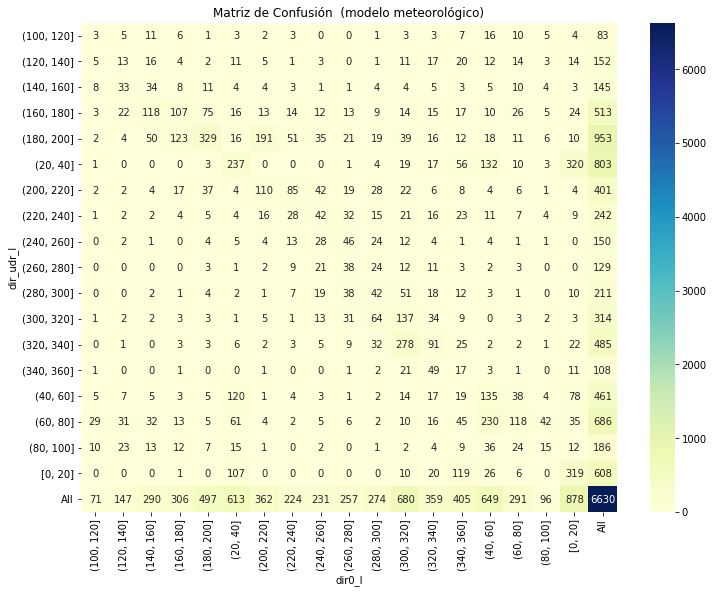

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Matriz de Confusión  (modelo meteorológico)")

global_sc = pd.crosstab(df_novar.dir_udr_l, df_novar.dir0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

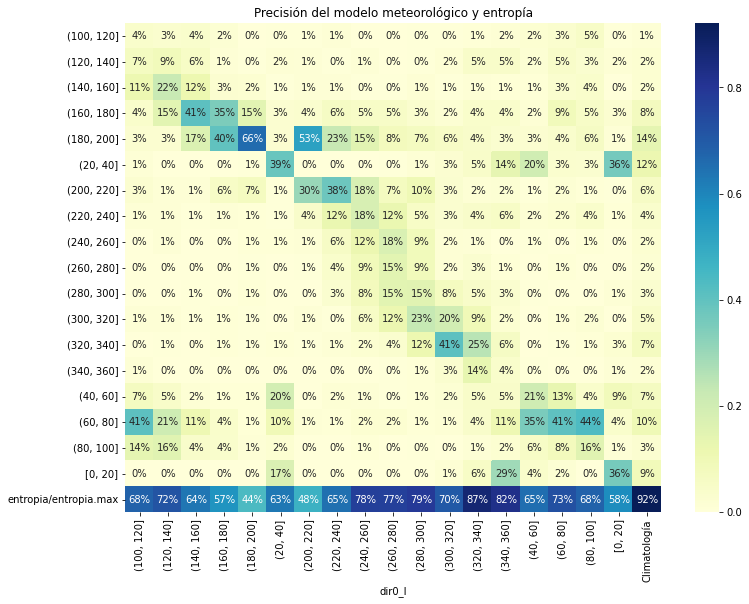

In [13]:
import math
from scipy.stats import entropy

plt.figure(figsize=(12, 9))
plt.title("Precisión del modelo meteorológico y entropía")
column_sc=pd.crosstab(df_novar.dir_udr_l, df_novar.dir0_l, margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropia/entropia.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatología"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');
#column_sc

In [ ]:
from pycaret.classification import *

clas = setup(df_all4k.drop(columns=["dir0_l"]), normalize=False, target = 'dir_udr_l') 


,Description,Value
0,session_id,7096
1,Target,dir_udr_l
2,Target Type,Multiclass
3,Label Encoded,"(100, 120]: 0, (120, 140]: 1, (140, 160]: 2, (..."
4,Original Data,"(7190, 101)"
5,Missing Values,False
6,Numeric Features,100
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models(fold=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.4451,0.8729,0.3125,0.4174,0.4206,0.3948,0.3961,2.9833
et,Extra Trees Classifier,0.4447,0.8713,0.3256,0.4198,0.4236,0.3948,0.3959,1.2767
lightgbm,Light Gradient Boosting Machine,0.4364,0.8671,0.3083,0.4091,0.4120,0.3849,0.3860,14.7300
gbc,Gradient Boosting Classifier,0.4072,0.8573,0.2829,0.3816,0.3882,0.3552,0.3561,101.9633
lda,Linear Discriminant Analysis,0.3451,0.8219,0.2570,0.3351,0.3349,0.2908,0.2915,0.1267
ridge,Ridge Classifier,0.3380,0.0000,0.1833,0.2832,0.2678,0.2679,0.2752,0.0867
dt,Decision Tree Classifier,0.3187,0.6344,0.2275,0.3241,0.3205,0.2643,0.2644,0.4533
knn,K Neighbors Classifier,0.3061,0.7364,0.2054,0.2956,0.2886,0.2444,0.2457,1.5667
lr,Logistic Regression,0.2964,0.7759,0.1586,0.2064,0.2129,0.2206,0.2301,9.1233
ada,Ada Boost Classifier,0.2372,0.6865,0.1538,0.2081,0.1984,0.1727,0.1774,2.3167


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4947, verbose=0,
                       warm_start=False)

In [ ]:
lightgbm=create_model("lightgbm",n_estimators=150,fold=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4312,0.8551,0.3048,0.4008,0.4103,0.3806,0.3814
1,0.4082,0.8499,0.2873,0.3846,0.3904,0.3555,0.3563
Mean,0.4197,0.8525,0.2960,0.3927,0.4004,0.3680,0.3688
SD,0.0115,0.0026,0.0088,0.0081,0.0099,0.0125,0.0126


In [ ]:
#full version required
preds=predict_model(lightgbm,drift_report=True)

In [ ]:
plot_model(lightgbm,plot ="confusion_matrix",plot_kwargs={"percent":True})

In [ ]:
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
x_var=get_config("X_train").columns
x_var

Index(['dir0', 'snow_prec0', 'mod0', 'wind_gust0', 'temp0', 'rh0',
       'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0', 'prec0', 'swflx0',
       'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0', 'cft0', 'HGT5000',
       'T5000', 'T8500', 'dir1', 'snow_prec1', 'mod1', 'wind_gust1', 'mslp1',
       'temp1', 'rh1', 'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1',
       'prec1', 'swflx1', 'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1',
       'cft1', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2', 'wind_gust2',
       'temp2', 'rh2', 'visibility2', 'lhflx2', 'lwflx2', 'conv_prec2',
       'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2', 'cfh2', 'cfl2', 'cfm2',
       'cft2', 'dir3', 'snow_prec3', 'mod3', 'wind_gust3', 'rh3',
       'visibility3', 'lhflx3', 'lwflx3', 'conv_prec3', 'prec3', 'swflx3',
       'shflx3', 'cape3', 'cin3', 'cfh3', 'cfl3', 'cfm3', 'cft3'],
      dtype='object')

**Export model**

In [14]:
# target variable
Y = df_all1k.dir_udr_l

# independent variables
x_var = ['dir0',  'mod0', 'wind_gust0', 'temp0', 'rh0', 'visibility0', 'lhflx0',
     'lwflx0', 'conv_prec0', 'prec0', 'swflx0','shflx0', 'cape0', 'cin0', 'cfh0',
     'cfl0', 'cfm0', 'cft0', 'HGT5000','T5000', 'T8500', 'dir1','mod1', 'wind_gust1',
     'mslp1','temp1', 'rh1', 'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1',
     'prec1', 'swflx1', 'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1',
     'cft1', 'dir2', 'mod2', 'wind_gust2','temp2', 'rh2', 'visibility2', 'lhflx2',
     'lwflx2', 'conv_prec2','prec2', 'swflx2', 'shflx2', 'cape2', 'cin2', 'cfh2',
     'cfl2', 'cfm2','cft2', 'dir3', 'snow_prec3', 'mod3', 'wind_gust3', 'rh3',
     'visibility3', 'lhflx3', 'lwflx3', 'conv_prec3', 'prec3', 'swflx3',
     'shflx3', 'cape3', 'cin3', 'cfh3', 'cfl3', 'cfm3', 'cft3']
X = df_all1k[x_var]

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=1)
ml_model = LGBMClassifier(n_estimators=150).fit(X_train,y_train)


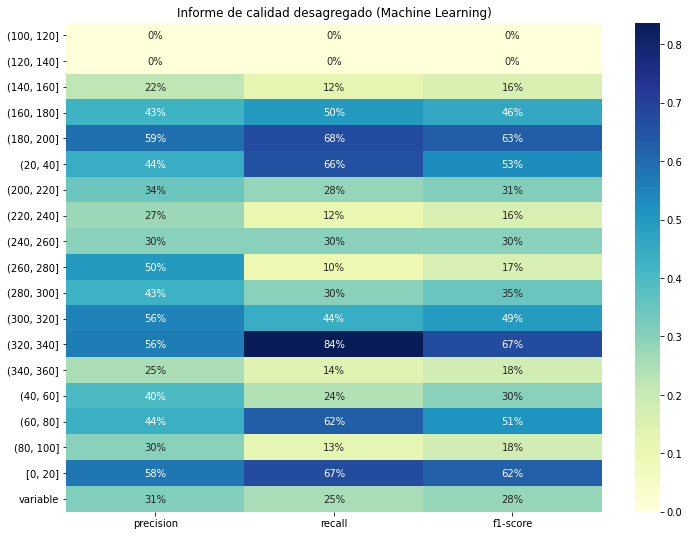

In [ ]:
cr=pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
plt.figure(figsize=(12, 9))
plt.title("Informe de calidad desagregado (Machine Learning)")
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


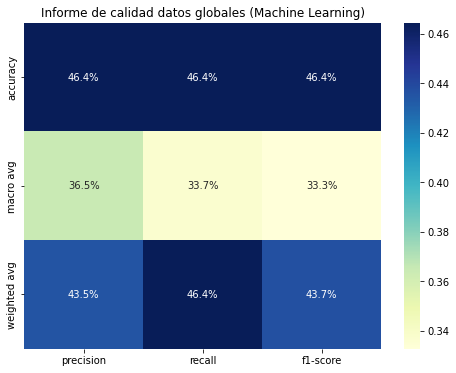

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Informe de calidad datos globales (Machine Learning)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

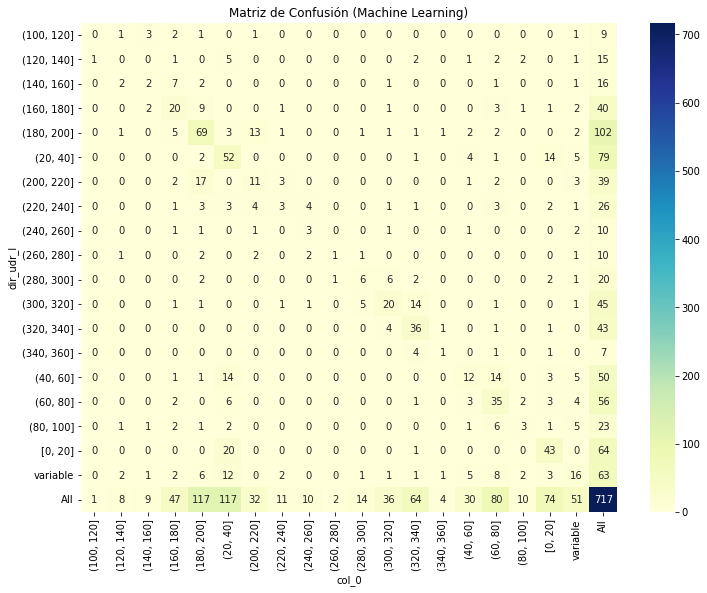

In [ ]:
plt.figure(figsize=(12, 9))
plt.title("Matriz de Confusión (Machine Learning)")
import seaborn as sns
global_sc=pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

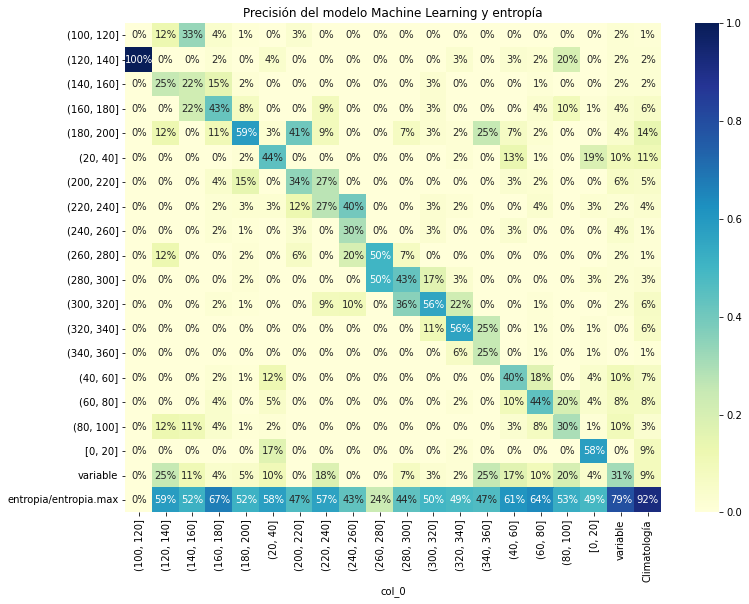

In [ ]:
import math
from scipy.stats import entropy

plt.figure(figsize=(12, 9))
plt.title("Precisión del modelo Machine Learning y entropía")
column_sc=pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropia/entropia.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatología"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

In [ ]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)

al_file={"coor":coor,"x_var":x_var,"pipe":pipe}
pickle.dump(al_file, open("dir_UDR_d0.al", 'wb'))



Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=150))])


**Machine learning loop**

In [ ]:
x_var = ['dir0',  'mod0', 'wind_gust0', 'temp0', 'rh0', 'visibility0', 'lhflx0',
     'lwflx0', 'conv_prec0', 'prec0', 'swflx0','shflx0', 'cape0', 'cin0', 'cfh0',
     'cfl0', 'cfm0', 'cft0', 'HGT5000','T5000', 'T8500', 'dir1','mod1', 'wind_gust1',
     'mslp1','temp1', 'rh1', 'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1',
     'prec1', 'swflx1', 'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1',
     'cft1', 'dir2', 'mod2', 'wind_gust2','temp2', 'rh2', 'visibility2', 'lhflx2',
     'lwflx2', 'conv_prec2','prec2', 'swflx2', 'shflx2', 'cape2', 'cin2', 'cfh2',
     'cfl2', 'cfm2','cft2', 'dir3', 'snow_prec3', 'mod3', 'wind_gust3', 'rh3',
     'visibility3', 'lhflx3', 'lwflx3', 'conv_prec3', 'prec3', 'swflx3',
     'shflx3', 'cape3', 'cin3', 'cfh3', 'cfl3', 'cfm3', 'cft3']

#independent variables
X = df_all1k[x_var]

# target variables
Y = df_all1k.dir_udr_l    

**lightgbm**

In [ ]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

pre = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, )

  #model train

  ml_model = LGBMClassifier(n_estimators=150).fit(X_train,y_train)

  #Confussion matrix

  #print("\nMatriz de Confusión  (Machine Learning)\n")

  #cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  #print(cm)
  
  
  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  cr = pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T

  pre.append(precision_score(y_test, ml_model.predict(X_test), average='micro'))
  print(cr)

print("\nEstadísticas precision")
pd.DataFrame(pre,columns=["precisión"]).describe()  


Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score     support
(100, 120]     0.000000  0.000000  0.000000    2.000000
(120, 140]     0.200000  0.066667  0.100000   15.000000
(140, 160]     0.333333  0.117647  0.173913   17.000000
(160, 180]     0.473684  0.397059  0.432000   68.000000
(180, 200]     0.547009  0.640000  0.589862  100.000000
(20, 40]       0.586207  0.653846  0.618182   78.000000
(200, 220]     0.483871  0.375000  0.422535   40.000000
(220, 240]     0.250000  0.210526  0.228571   19.000000
(240, 260]     0.000000  0.000000  0.000000   11.000000
(260, 280]     0.666667  0.133333  0.222222   15.000000
(280, 300]     0.100000  0.076923  0.086957   13.000000
(300, 320]     0.388889  0.411765  0.400000   34.000000
(320, 340]     0.561644  0.661290  0.607407   62.000000
(340, 360]     0.200000  0.090909  0.125000   11.000000
(40, 60]       0.476190  0.434783  0.454545   46.000000
(60, 80]       0.482353  0.719298  0.577465   57.000

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score     support
(100, 120]     0.000000  0.000000  0.000000    6.000000
(120, 140]     0.000000  0.000000  0.000000   13.000000
(140, 160]     0.400000  0.133333  0.200000   15.000000
(160, 180]     0.434783  0.370370  0.400000   54.000000
(180, 200]     0.588710  0.688679  0.634783  106.000000
(20, 40]       0.475248  0.640000  0.545455   75.000000
(200, 220]     0.435897  0.566667  0.492754   30.000000
(220, 240]     0.214286  0.120000  0.153846   25.000000
(240, 260]     0.400000  0.200000  0.266667   20.000000
(260, 280]     0.000000  0.000000  0.000000    8.000000
(280, 300]     0.222222  0.086957  0.125000   23.000000
(300, 320]     0.405405  0.454545  0.428571   33.000000
(320, 340]     0.451613  0.583333  0.509091   48.000000
(340, 360]     0.200000  0.090909  0.125000   11.000000
(40, 60]       0.312500  0.333333  0.322581   45.000000
(60, 80]       0.577465  0.506173  0.539474   81.000000
(80, 100]      0.142857  0.090909  0.111111   11

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score    support
(100, 120]     0.000000  0.000000  0.000000    7.00000
(120, 140]     0.000000  0.000000  0.000000   11.00000
(140, 160]     0.454545  0.454545  0.454545   11.00000
(160, 180]     0.488889  0.478261  0.483516   46.00000
(180, 200]     0.581197  0.629630  0.604444  108.00000
(20, 40]       0.520408  0.600000  0.557377   85.00000
(200, 220]     0.318182  0.400000  0.354430   35.00000
(220, 240]     0.166667  0.111111  0.133333   18.00000
(240, 260]     0.333333  0.136364  0.193548   22.00000
(260, 280]     0.500000  0.214286  0.300000   14.00000
(280, 300]     0.350000  0.259259  0.297872   27.00000
(300, 320]     0.384615  0.441176  0.410959   34.00000
(320, 340]     0.469388  0.500000  0.484211   46.00000
(340, 360]     0.250000  0.142857  0.181818    7.00000
(40, 60]       0.473684  0.346154  0.400000   52.00000
(60, 80]       0.546667  0.706897  0.616541   58.00000
(80, 100]      0.142857  0.055556  0.080000   18.00000
[0, 20]   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score     support
(100, 120]     0.000000  0.000000  0.000000    3.000000
(120, 140]     0.000000  0.000000  0.000000   22.000000
(140, 160]     0.000000  0.000000  0.000000   11.000000
(160, 180]     0.510204  0.480769  0.495050   52.000000
(180, 200]     0.541284  0.648352  0.590000   91.000000
(20, 40]       0.459184  0.562500  0.505618   80.000000
(200, 220]     0.292683  0.363636  0.324324   33.000000
(220, 240]     0.333333  0.037037  0.066667   27.000000
(240, 260]     0.833333  0.263158  0.400000   19.000000
(260, 280]     0.250000  0.500000  0.333333    6.000000
(280, 300]     0.285714  0.222222  0.250000   18.000000
(300, 320]     0.407407  0.379310  0.392857   29.000000
(320, 340]     0.646154  0.666667  0.656250   63.000000
(340, 360]     0.500000  0.153846  0.235294   13.000000
(40, 60]       0.307692  0.266667  0.285714   45.000000
(60, 80]       0.395062  0.551724  0.460432   58.000000
(80, 100]      0.000000  0.000000  0.000000   18

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score     support
(100, 120]     0.000000  0.000000  0.000000    5.000000
(120, 140]     0.000000  0.000000  0.000000   17.000000
(140, 160]     0.000000  0.000000  0.000000   15.000000
(160, 180]     0.428571  0.488372  0.456522   43.000000
(180, 200]     0.552632  0.707865  0.620690   89.000000
(20, 40]       0.425743  0.605634  0.500000   71.000000
(200, 220]     0.562500  0.409091  0.473684   44.000000
(220, 240]     0.125000  0.080000  0.097561   25.000000
(240, 260]     0.461538  0.333333  0.387097   18.000000
(260, 280]     0.200000  0.142857  0.166667    7.000000
(280, 300]     0.416667  0.238095  0.303030   21.000000
(300, 320]     0.428571  0.375000  0.400000   40.000000
(320, 340]     0.447761  0.576923  0.504202   52.000000
(340, 360]     0.000000  0.000000  0.000000   11.000000
(40, 60]       0.263158  0.192308  0.222222   52.000000
(60, 80]       0.442308  0.647887  0.525714   71.000000
(80, 100]      0.250000  0.052632  0.086957   19

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score     support
(100, 120]     0.000000  0.000000  0.000000    4.000000
(120, 140]     0.166667  0.041667  0.066667   24.000000
(140, 160]     0.250000  0.090909  0.133333   11.000000
(160, 180]     0.413793  0.461538  0.436364   52.000000
(180, 200]     0.630631  0.729167  0.676329   96.000000
(20, 40]       0.488095  0.546667  0.515723   75.000000
(200, 220]     0.365854  0.384615  0.375000   39.000000
(220, 240]     0.428571  0.230769  0.300000   26.000000
(240, 260]     0.176471  0.200000  0.187500   15.000000
(260, 280]     0.000000  0.000000  0.000000   12.000000
(280, 300]     0.416667  0.185185  0.256410   27.000000
(300, 320]     0.300000  0.444444  0.358209   27.000000
(320, 340]     0.569231  0.660714  0.611570   56.000000
(340, 360]     0.000000  0.000000  0.000000    9.000000
(40, 60]       0.341463  0.285714  0.311111   49.000000
(60, 80]       0.535714  0.616438  0.573248   73.000000
(80, 100]      0.100000  0.066667  0.080000   15

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score    support
(100, 120]     0.000000  0.000000  0.000000   10.00000
(120, 140]     0.000000  0.000000  0.000000   12.00000
(140, 160]     1.000000  0.157895  0.272727   19.00000
(160, 180]     0.426230  0.530612  0.472727   49.00000
(180, 200]     0.623853  0.673267  0.647619  101.00000
(20, 40]       0.491071  0.696203  0.575916   79.00000
(200, 220]     0.451613  0.378378  0.411765   37.00000
(220, 240]     0.272727  0.120000  0.166667   25.00000
(240, 260]     0.285714  0.166667  0.210526   12.00000
(260, 280]     0.111111  0.100000  0.105263   10.00000
(280, 300]     0.000000  0.000000  0.000000   14.00000
(300, 320]     0.352941  0.461538  0.400000   26.00000
(320, 340]     0.526316  0.638298  0.576923   47.00000
(340, 360]     0.333333  0.071429  0.117647   14.00000
(40, 60]       0.342105  0.270833  0.302326   48.00000
(60, 80]       0.485149  0.628205  0.547486   78.00000
(80, 100]      0.200000  0.105263  0.137931   19.00000
[0, 20]   

,precisión
count,10.000000
mean,0.453975
std,0.013873
min,0.433752
25%,0.448745
50%,0.451883
75%,0.461297
max,0.481172


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.neural_network import MLPClassifier

pre = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, )


  #scale Xtrain
  scale = StandardScaler().fit(X_train)
  Xs_train = scale.transform(X_train)

  #pca
  pca = PCA(n_components=len(x_var)-1).fit(Xs_train)
  pca_train= pca.transform(Xs_train)

  #model train

  ml_model = MLPClassifier(hidden_layer_sizes=(100,50,20)).fit(pca_train,y_train)

  #Confussion matrix

  #print("\nMatriz de Confusión  (Machine Learning)\n")

  #cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  #print(cm)
  
  
  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")

  y_pred = ml_model.predict(pca.transform(scale.transform(X_test)))
  cr = pd.DataFrame(classification_report(y_test,y_pred,output_dict=True)).T

  pre.append(precision_score(y_test, y_pred, average='micro'))
  print(cr)

print("\nEstadísticas precision")
pd.DataFrame(pre,columns=["precisión"]).describe()  

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.




Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score     support
(100, 120]     0.000000  0.000000  0.000000    2.000000
(120, 140]     0.200000  0.066667  0.100000   15.000000
(140, 160]     0.250000  0.133333  0.173913   15.000000
(160, 180]     0.428571  0.375000  0.400000   56.000000
(180, 200]     0.621849  0.672727  0.646288  110.000000
(20, 40]       0.365591  0.485714  0.417178   70.000000
(200, 220]     0.295455  0.382353  0.333333   34.000000
(220, 240]     0.115385  0.150000  0.130435   20.000000
(240, 260]     0.214286  0.142857  0.171429   21.000000
(260, 280]     0.000000  0.000000  0.000000   11.000000
(280, 300]     0.066667  0.058824  0.062500   17.000000
(300, 320]     0.200000  0.269231  0.229508   26.000000
(320, 340]     0.461538  0.452830  0.457143   53.000000
(340, 360]     0.333333  0.142857  0.200000   14.000000
(40, 60]       0.326087  0.348837  0.337079   43.000000
(60, 80]       0.473684  0.580645  0.521739   62.000

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.




Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score     support
(100, 120]     0.142857  0.166667  0.153846    6.000000
(120, 140]     0.000000  0.000000  0.000000   17.000000
(140, 160]     0.090909  0.076923  0.083333   13.000000
(160, 180]     0.422222  0.306452  0.355140   62.000000
(180, 200]     0.500000  0.572917  0.533981   96.000000
(20, 40]       0.431579  0.546667  0.482353   75.000000
(200, 220]     0.303030  0.263158  0.281690   38.000000
(220, 240]     0.133333  0.148148  0.140351   27.000000
(240, 260]     0.200000  0.300000  0.240000   10.000000
(260, 280]     0.000000  0.000000  0.000000   12.000000
(280, 300]     0.076923  0.111111  0.090909   18.000000
(300, 320]     0.238095  0.151515  0.185185   33.000000
(320, 340]     0.413043  0.558824  0.475000   34.000000
(340, 360]     0.000000  0.000000  0.000000   14.000000
(40, 60]       0.415094  0.423077  0.419048   52.000000
(60, 80]       0.550000  0.515625  0.532258   64.000

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.




Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score     support
(100, 120]     0.071429  0.100000  0.083333   10.000000
(120, 140]     0.083333  0.066667  0.074074   15.000000
(140, 160]     0.400000  0.333333  0.363636   12.000000
(160, 180]     0.333333  0.294118  0.312500   51.000000
(180, 200]     0.636364  0.494949  0.556818   99.000000
(20, 40]       0.461538  0.423529  0.441718   85.000000
(200, 220]     0.404762  0.435897  0.419753   39.000000
(220, 240]     0.142857  0.111111  0.125000   27.000000
(240, 260]     0.277778  0.416667  0.333333   12.000000
(260, 280]     0.272727  0.250000  0.260870   12.000000
(280, 300]     0.238095  0.277778  0.256410   18.000000
(300, 320]     0.357143  0.333333  0.344828   30.000000
(320, 340]     0.475410  0.568627  0.517857   51.000000
(340, 360]     0.187500  0.200000  0.193548   15.000000
(40, 60]       0.327273  0.367347  0.346154   49.000000
(60, 80]       0.514286  0.455696  0.483221   79.000

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.




Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score     support
(100, 120]     0.600000  0.230769  0.333333   13.000000
(120, 140]     0.187500  0.142857  0.162162   21.000000
(140, 160]     0.125000  0.062500  0.083333   16.000000
(160, 180]     0.241935  0.340909  0.283019   44.000000
(180, 200]     0.613208  0.575221  0.593607  113.000000
(20, 40]       0.459770  0.547945  0.500000   73.000000
(200, 220]     0.344828  0.294118  0.317460   34.000000
(220, 240]     0.095238  0.117647  0.105263   17.000000
(240, 260]     0.000000  0.000000  0.000000   13.000000
(260, 280]     0.090909  0.100000  0.095238   10.000000
(280, 300]     0.315789  0.315789  0.315789   19.000000
(300, 320]     0.259259  0.350000  0.297872   20.000000
(320, 340]     0.490909  0.529412  0.509434   51.000000
(340, 360]     0.222222  0.133333  0.166667   15.000000
(40, 60]       0.392157  0.370370  0.380952   54.000000
(60, 80]       0.516484  0.618421  0.562874   76.000

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.




Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score     support
(100, 120]     0.142857  0.166667  0.153846    6.000000
(120, 140]     0.125000  0.111111  0.117647    9.000000
(140, 160]     0.285714  0.166667  0.210526   12.000000
(160, 180]     0.318841  0.423077  0.363636   52.000000
(180, 200]     0.513158  0.481481  0.496815   81.000000
(20, 40]       0.514563  0.552083  0.532663   96.000000
(200, 220]     0.387097  0.315789  0.347826   38.000000
(220, 240]     0.200000  0.148148  0.170213   27.000000
(240, 260]     0.222222  0.083333  0.121212   24.000000
(260, 280]     0.000000  0.000000  0.000000   14.000000
(280, 300]     0.333333  0.347826  0.340426   23.000000
(300, 320]     0.310345  0.321429  0.315789   28.000000
(320, 340]     0.479167  0.489362  0.484211   47.000000
(340, 360]     0.285714  0.181818  0.222222   11.000000
(40, 60]       0.322034  0.358491  0.339286   53.000000
(60, 80]       0.430233  0.480519  0.453988   77.000

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.




Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score     support
(100, 120]     0.000000  0.000000  0.000000    5.000000
(120, 140]     0.055556  0.062500  0.058824   16.000000
(140, 160]     0.200000  0.200000  0.200000   15.000000
(160, 180]     0.460317  0.475410  0.467742   61.000000
(180, 200]     0.590909  0.504854  0.544503  103.000000
(20, 40]       0.484211  0.547619  0.513966   84.000000
(200, 220]     0.342857  0.300000  0.320000   40.000000
(220, 240]     0.129032  0.153846  0.140351   26.000000
(240, 260]     0.181818  0.153846  0.166667   13.000000
(260, 280]     0.090909  0.066667  0.076923   15.000000
(280, 300]     0.214286  0.230769  0.222222   13.000000
(300, 320]     0.368421  0.241379  0.291667   29.000000
(320, 340]     0.385965  0.488889  0.431373   45.000000
(340, 360]     0.428571  0.200000  0.272727   15.000000
(40, 60]       0.319149  0.348837  0.333333   43.000000
(60, 80]       0.371795  0.460317  0.411348   63.000

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.




Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score    support
(100, 120]     0.500000  0.285714  0.363636    7.00000
(120, 140]     0.043478  0.058824  0.050000   17.00000
(140, 160]     0.263158  0.227273  0.243902   22.00000
(160, 180]     0.404762  0.435897  0.419753   39.00000
(180, 200]     0.600000  0.515152  0.554348   99.00000
(20, 40]       0.433333  0.481481  0.456140   81.00000
(200, 220]     0.288462  0.394737  0.333333   38.00000
(220, 240]     0.125000  0.136364  0.130435   22.00000
(240, 260]     0.214286  0.150000  0.176471   20.00000
(260, 280]     0.142857  0.100000  0.117647   10.00000
(280, 300]     0.142857  0.105263  0.121212   19.00000
(300, 320]     0.473684  0.545455  0.507042   33.00000
(320, 340]     0.491803  0.566038  0.526316   53.00000
(340, 360]     0.333333  0.071429  0.117647   14.00000
(40, 60]       0.369565  0.361702  0.365591   47.00000
(60, 80]       0.377049  0.418182  0.396552   55.00000
(80, 100]    

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.




Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score     support
(100, 120]     0.250000  0.083333  0.125000   12.000000
(120, 140]     0.000000  0.000000  0.000000   11.000000
(140, 160]     0.052632  0.111111  0.071429    9.000000
(160, 180]     0.469388  0.383333  0.422018   60.000000
(180, 200]     0.500000  0.510204  0.505051   98.000000
(20, 40]       0.476744  0.525641  0.500000   78.000000
(200, 220]     0.279070  0.342857  0.307692   35.000000
(220, 240]     0.115385  0.100000  0.107143   30.000000
(240, 260]     0.071429  0.076923  0.074074   13.000000
(260, 280]     0.062500  0.076923  0.068966   13.000000
(280, 300]     0.272727  0.115385  0.162162   26.000000
(300, 320]     0.259259  0.225806  0.241379   31.000000
(320, 340]     0.442857  0.704545  0.543860   44.000000
(340, 360]     0.000000  0.000000  0.000000    6.000000
(40, 60]       0.354839  0.250000  0.293333   44.000000
(60, 80]       0.628571  0.571429  0.598639   77.000

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.




Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score     support
(100, 120]     0.000000  0.000000  0.000000    6.000000
(120, 140]     0.166667  0.153846  0.160000   13.000000
(140, 160]     0.076923  0.066667  0.071429   15.000000
(160, 180]     0.339623  0.321429  0.330275   56.000000
(180, 200]     0.542169  0.576923  0.559006   78.000000
(20, 40]       0.616438  0.616438  0.616438   73.000000
(200, 220]     0.500000  0.441860  0.469136   43.000000
(220, 240]     0.117647  0.086957  0.100000   23.000000
(240, 260]     0.181818  0.250000  0.210526    8.000000
(260, 280]     0.187500  0.272727  0.222222   11.000000
(280, 300]     0.050000  0.045455  0.047619   22.000000
(300, 320]     0.243243  0.281250  0.260870   32.000000
(320, 340]     0.477612  0.524590  0.500000   61.000000
(340, 360]     0.133333  0.153846  0.142857   13.000000
(40, 60]       0.375000  0.357143  0.365854   42.000000
(60, 80]       0.521739  0.631579  0.571429   76.000

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



,precisión
count,10.000000
mean,0.391655
std,0.012374
min,0.375522
25%,0.385257
50%,0.387344
75%,0.393950
max,0.413074


**D1 forecast**

In [16]:
#ria forecast d1 (1Km spatial resolution)
ria_model1k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/meteorological_models/lat42.3394lon-8.8339p10R1KmD1.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
ria_model1k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape9,cin9,cfh9,cfl9,cfm9,cft9,HGT5009,HGT8509,T5009,T8509
time,,,,,,,,,,,,,,,,,,,,,
2021-03-12 00:00:00,279.054840,0.0,1251.362793,3.504231,3.619567,102440.171875,285.724243,0.766336,24050.791016,30.851248,...,47.750000,-2.476438,0.1,0.300000,0.0,0.300000,5612.219238,1535.963745,254.020630,273.278931
2021-03-12 01:00:00,274.202576,0.0,1248.847290,3.575284,3.760854,102610.273438,284.845825,0.839504,24040.951172,35.755413,...,86.709999,-0.550086,0.0,0.600000,0.0,0.600000,5606.633789,1529.916138,253.733932,273.588501
2021-03-12 02:00:00,307.992065,0.0,1176.645020,4.890311,5.566508,102591.695312,285.421631,0.826632,24046.685547,40.679413,...,127.550003,-1.468750,0.0,0.500000,0.0,0.500000,5593.544922,1526.968140,253.286819,272.640747
2021-03-12 03:00:00,290.593384,0.0,1141.667725,5.053596,5.662030,102519.757812,285.445007,0.794363,24039.033203,48.590050,...,125.589996,-0.000383,0.0,0.189458,0.0,0.189458,5582.627930,1523.607544,253.200439,272.528870
2021-03-12 04:00:00,275.568604,0.0,1106.988281,6.200126,6.871034,102421.054688,284.951813,0.776907,24038.275391,74.082352,...,61.400002,-4.774656,0.0,0.400000,0.0,0.400000,5563.532227,1519.895630,252.660873,272.257385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-20 19:00:00,16.088127,0.0,1711.676758,4.648067,8.763473,102884.828125,284.025757,0.786543,24135.000000,28.007874,...,0.000000,-0.000031,0.0,0.000000,0.0,0.000000,5696.591797,1584.723511,254.149872,277.832306
2022-01-20 20:00:00,41.737507,0.0,1783.811646,6.319060,8.176977,102974.382812,284.357239,0.725985,24135.000000,52.217976,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5695.561523,1589.607910,254.225067,278.542114
2022-01-20 21:00:00,53.405930,0.0,1727.166504,6.770741,7.309320,102896.796875,283.829376,0.724122,24135.000000,65.125198,...,0.000000,0.000049,0.0,0.000000,0.0,0.000000,5710.236816,1584.105347,254.391495,278.232513


In [17]:
#label meteorological variable
interval=pd.IntervalIndex.from_tuples([(-0.5,20), (20, 40), (40, 60),
                                       (60,80),(80,100),(100,120),(120,140),(140,160),
                                       (160,180),(180,200),(200,220),(220,240),
                                       (240,260),(260,280),(280,300),(300,320),
                                       (320,340),(340,360)])
labels=['[0, 20]', '(20, 40]', '(40, 60]','(60, 80]', '(80, 100]', '(100, 120]',
        '(120, 140]','(140, 160]', '(160, 180]', '(180, 200]', '(200, 220]',
        '(220, 240]', '(240, 260]', '(260, 280]', '(280, 300]','(300, 320]',
        '(320, 340]', '(340, 360]']
ria_model1k["dir0_l"]=pd.cut(ria_model1k["dir0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str) 
ria_model1k[["dir0_l","dir0"]].sample(20)


,dir0_l,dir0
time,,
2021-12-06 12:00:00,"(180, 200]",196.256592
2021-09-10 14:00:00,"(220, 240]",228.726959
2021-04-16 22:00:00,"(20, 40]",26.874828
2021-12-20 13:00:00,"(120, 140]",138.764114
2021-12-16 05:00:00,"(200, 220]",203.562469
2021-09-27 06:00:00,"(340, 360]",341.147491
2021-09-21 10:00:00,"(20, 40]",23.640541
2021-07-16 14:00:00,"(300, 320]",303.209076
2021-05-18 09:00:00,"(260, 280]",269.191040


In [19]:
#merge meteorological model and station

df_all1k = pd.concat([station["dir_udr_l"],ria_model1k],axis=1).dropna()
df_all1k

,dir_udr_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cin9,cfh9,cfl9,cfm9,cft9,HGT5009,HGT8509,T5009,T8509,dir0_l
time,,,,,,,,,,,,,,,,,,,,,
2021-03-12 00:00:00,"(300, 320]",279.054840,0.0,1251.362793,3.504231,3.619567,102440.171875,285.724243,0.766336,24050.791016,...,-2.476438,0.100000,0.300000,0.0,0.300000,5612.219238,1535.963745,254.020630,273.278931,"(260, 280]"
2021-03-12 01:00:00,"(300, 320]",274.202576,0.0,1248.847290,3.575284,3.760854,102610.273438,284.845825,0.839504,24040.951172,...,-0.550086,0.000000,0.600000,0.0,0.600000,5606.633789,1529.916138,253.733932,273.588501,"(260, 280]"
2021-03-12 02:00:00,"(300, 320]",307.992065,0.0,1176.645020,4.890311,5.566508,102591.695312,285.421631,0.826632,24046.685547,...,-1.468750,0.000000,0.500000,0.0,0.500000,5593.544922,1526.968140,253.286819,272.640747,"(300, 320]"
2021-03-12 03:00:00,"(160, 180]",290.593384,0.0,1141.667725,5.053596,5.662030,102519.757812,285.445007,0.794363,24039.033203,...,-0.000383,0.000000,0.189458,0.0,0.189458,5582.627930,1523.607544,253.200439,272.528870,"(280, 300]"
2021-03-12 04:00:00,variable,275.568604,0.0,1106.988281,6.200126,6.871034,102421.054688,284.951813,0.776907,24038.275391,...,-4.774656,0.000000,0.400000,0.0,0.400000,5563.532227,1519.895630,252.660873,272.257385,"(260, 280]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19 20:00:00,"(60, 80]",47.236660,0.0,1766.653076,5.817563,6.661743,103215.304688,285.609741,0.635920,24135.000000,...,0.000000,0.169044,0.000000,0.0,0.169044,5719.444824,1610.836548,252.625000,278.936798,"(40, 60]"
2022-01-19 21:00:00,"(60, 80]",35.032013,0.0,1787.929810,4.984383,5.764468,103222.007812,285.459930,0.630627,24135.000000,...,0.000000,0.118611,0.000000,0.0,0.118611,5719.372559,1610.954102,252.470932,279.394623,"(20, 40]"
2022-01-19 22:00:00,"(40, 60]",32.511234,0.0,1815.733398,4.481787,5.026285,103217.398438,285.125427,0.639514,24135.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,5718.312012,1610.876465,252.136246,279.790985,"(20, 40]"


In [20]:
df_all1k[["dir0_l","dir0","dir_udr_l"]]

,dir0_l,dir0,dir_udr_l
time,,,
2021-03-12 00:00:00,"(260, 280]",279.054840,"(300, 320]"
2021-03-12 01:00:00,"(260, 280]",274.202576,"(300, 320]"
2021-03-12 02:00:00,"(300, 320]",307.992065,"(300, 320]"
2021-03-12 03:00:00,"(280, 300]",290.593384,"(160, 180]"
2021-03-12 04:00:00,"(260, 280]",275.568604,variable
...,...,...,...
2022-01-19 20:00:00,"(40, 60]",47.236660,"(60, 80]"
2022-01-19 21:00:00,"(20, 40]",35.032013,"(60, 80]"
2022-01-19 22:00:00,"(20, 40]",32.511234,"(40, 60]"


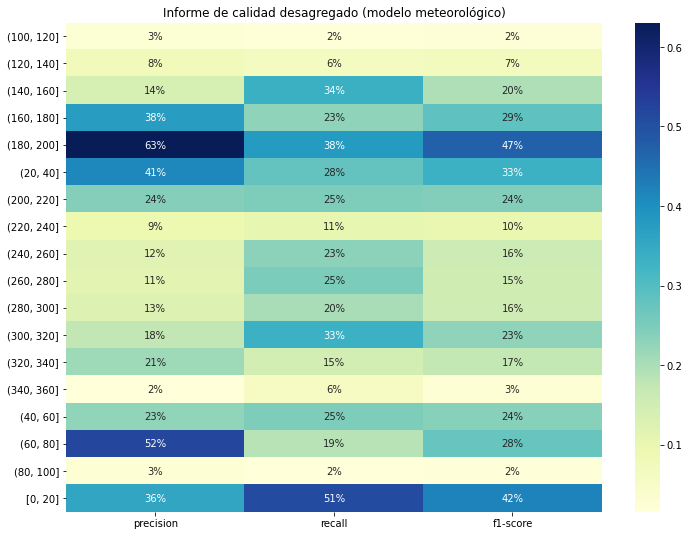

In [21]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Informe de calidad desagregado (modelo meteorológico)")

df_novar = df_all1k.drop(df_all1k[df_all1k.dir_udr_l == "variable" ].index)
cr=pd.DataFrame(classification_report(df_novar.dir_udr_l, df_novar.dir0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


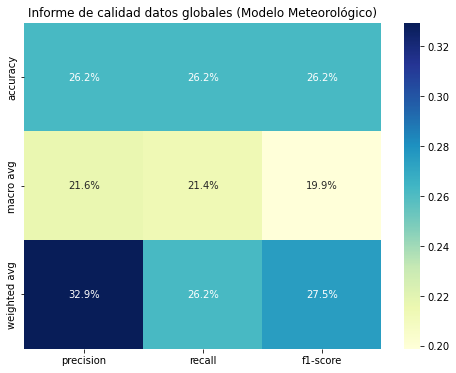

In [22]:
plt.figure(figsize=(8, 6))
plt.title("Informe de calidad datos globales (Modelo Meteorológico)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

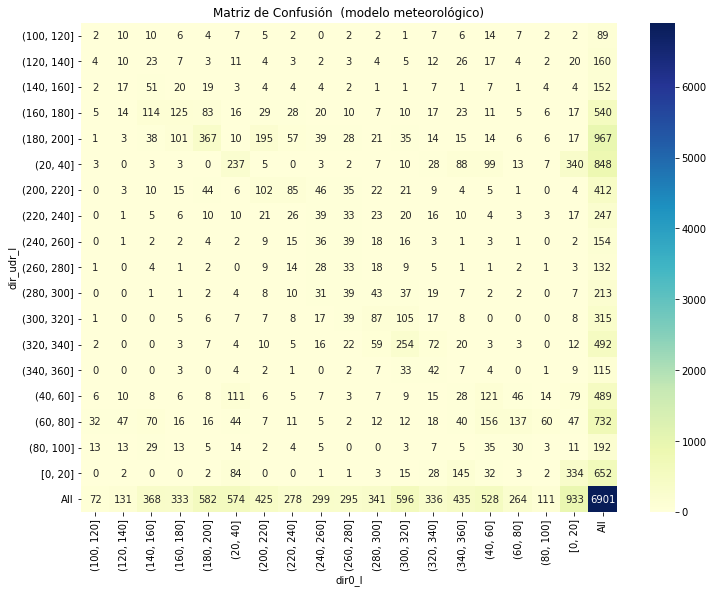

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Matriz de Confusión  (modelo meteorológico)")
global_sc=pd.crosstab(df_novar.dir_udr_l, df_novar.dir0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

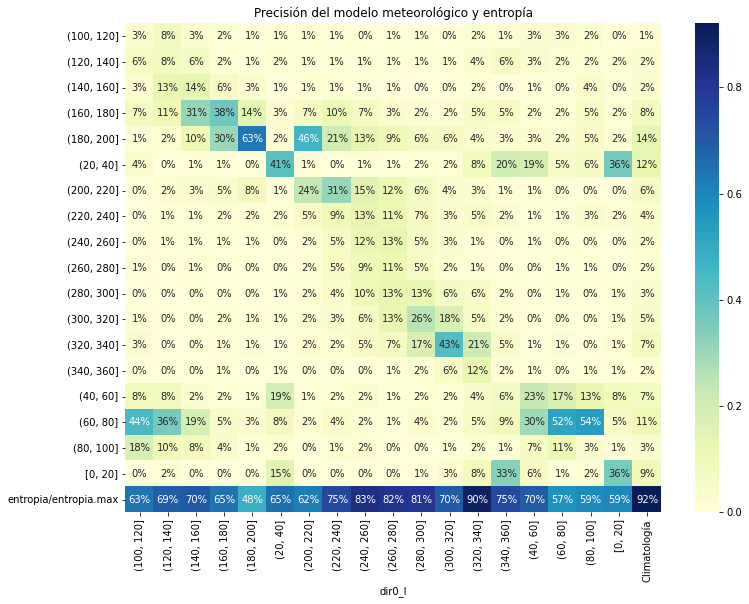

In [24]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Precisión del modelo meteorológico y entropía")
column_sc=pd.crosstab(df_novar.dir_udr_l, df_novar.dir0_l, margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropia/entropia.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatología"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**Export ml model**

In [25]:
# target variable
Y = df_all1k.dir_udr_l

# independent variables drop dir0_l and 
x_var = ['dir0',  'mod0', 'wind_gust0', 'temp0', 'rh0', 'visibility0', 'lhflx0',
     'lwflx0', 'conv_prec0', 'prec0', 'swflx0','shflx0', 'cape0', 'cin0', 'cfh0',
     'cfl0', 'cfm0', 'cft0', 'HGT5000','T5000', 'T8500', 'dir1','mod1', 'wind_gust1',
     'mslp1','temp1', 'rh1', 'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1',
     'prec1', 'swflx1', 'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1',
     'cft1', 'dir2', 'mod2', 'wind_gust2','temp2', 'rh2', 'visibility2', 'lhflx2',
     'lwflx2', 'conv_prec2','prec2', 'swflx2', 'shflx2', 'cape2', 'cin2', 'cfh2',
     'cfl2', 'cfm2','cft2', 'dir3', 'snow_prec3', 'mod3', 'wind_gust3', 'rh3',
     'visibility3', 'lhflx3', 'lwflx3', 'conv_prec3', 'prec3', 'swflx3',
     'shflx3', 'cape3', 'cin3', 'cfh3', 'cfl3', 'cfm3', 'cft3']
X = df_all1k[x_var]

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=1)
ml_model = LGBMClassifier(n_estimators=150).fit(X_train,y_train)

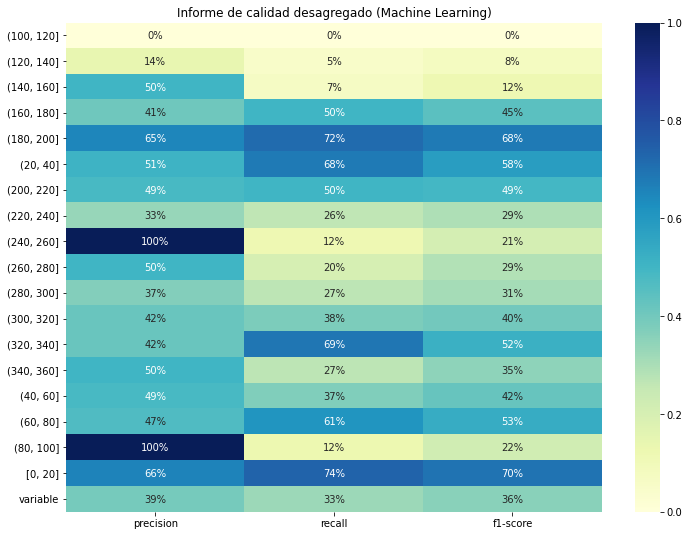

In [27]:
cr = pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
plt.figure(figsize=(12, 9))
plt.title("Informe de calidad desagregado (Machine Learning)")
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


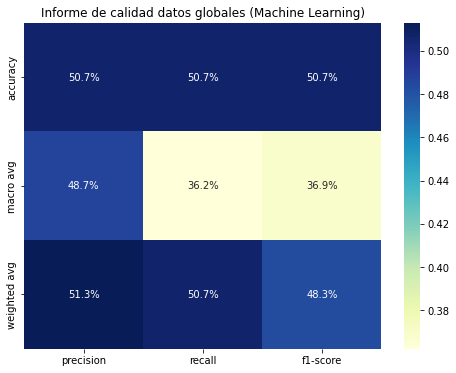

In [28]:
plt.figure(figsize=(8, 6))
plt.title("Informe de calidad datos globales (Machine Learning)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

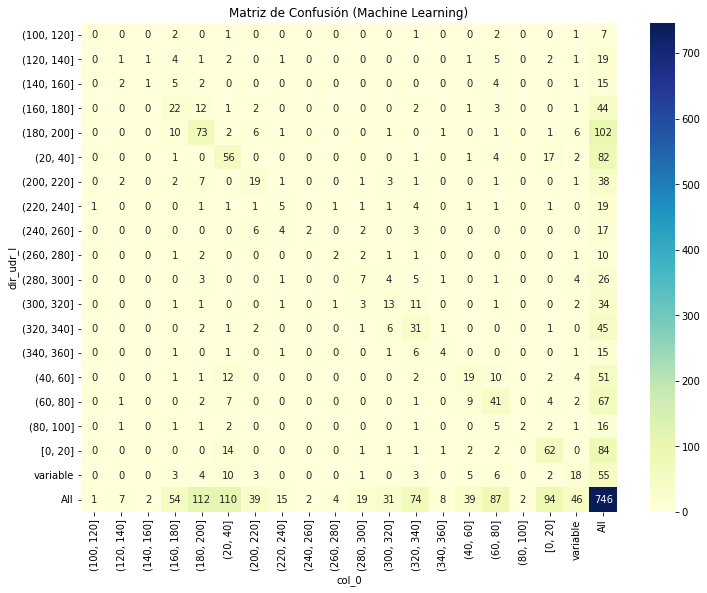

In [29]:
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Matriz de Confusión (Machine Learning)")

global_sc = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

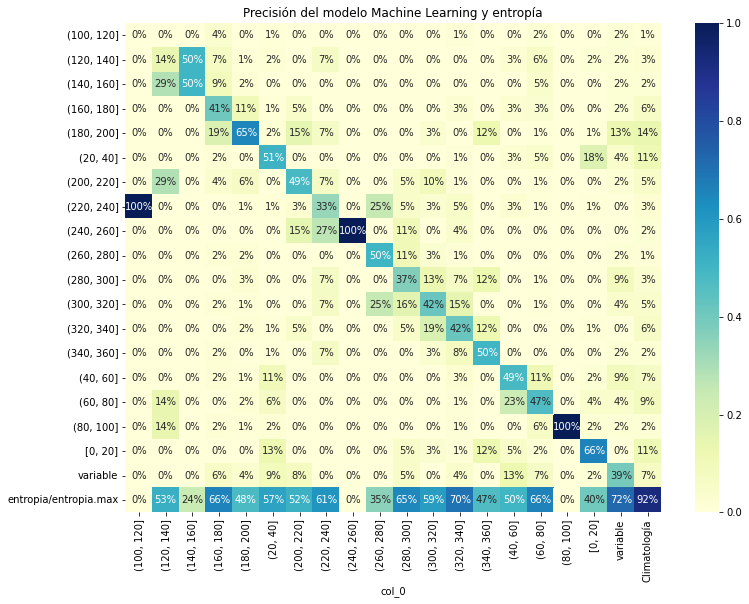

In [30]:
import math
from scipy.stats import entropy

plt.figure(figsize=(12, 9))
plt.title("Precisión del modelo Machine Learning y entropía")
column_sc = pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropia/entropia.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatología"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

In [ ]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)

al_file={"coor":coor,"x_var":x_var,"pipe":pipe}
pickle.dump(al_file, open("dir_UDR_d1.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=150))])


**Forecast d2**

In [31]:
#ria forecast d2 (1Km spatial resolution)
ria_model1k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/meteorological_models/lat42.3394lon-8.8339p5R1KmD2.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
ria_model1k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape4,cin4,cfh4,cfl4,cfm4,cft4,HGT5004,HGT8504,T5004,T8504
time,,,,,,,,,,,,,,,,,,,,,
2021-03-13 00:00:00,232.897141,0.0,1145.400635,5.608826,6.211264,102491.281250,285.377869,0.808105,24049.521484,52.141895,...,77.040001,0.000262,0.0,0.393935,0.0,0.393935,5584.541016,1533.855957,251.110443,273.145264
2021-03-13 01:00:00,236.505875,0.0,1128.458130,6.948990,7.696385,102559.281250,285.492065,0.779223,24046.267578,73.288048,...,78.419998,-0.481832,0.0,0.470000,0.0,0.470000,5587.729492,1529.910156,251.444870,272.633423
2021-03-13 02:00:00,234.612900,0.0,1150.002808,8.757957,9.452009,102508.210938,284.922882,0.844420,24043.474609,86.095306,...,65.029999,-2.693566,0.0,0.300000,0.0,0.300000,5586.957031,1521.910156,251.895187,272.973328
2021-03-13 03:00:00,236.279633,0.0,1181.897949,7.668866,8.860730,102383.453125,285.240570,0.804150,24043.093750,80.407768,...,40.270000,-1.000844,0.0,0.900000,0.0,0.900000,5578.222168,1520.360596,252.164505,273.228485
2021-03-13 04:00:00,241.957916,0.0,1146.495483,7.406095,8.115970,102304.625000,285.334991,0.795514,24042.619141,76.496552,...,67.910004,-0.156582,0.0,0.500000,0.0,0.500000,5569.572754,1515.353149,252.610504,272.584564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-21 19:00:00,60.148472,0.0,1605.576782,5.528185,7.280736,102942.453125,283.599121,0.648899,24135.000000,70.339172,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5658.487793,1572.499878,251.613251,277.788635
2022-01-21 20:00:00,53.573380,0.0,1653.773071,5.839155,6.419994,103084.671875,283.781555,0.634750,24135.000000,75.100769,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5667.683105,1583.717651,251.817749,277.988251
2022-01-21 21:00:00,58.685669,0.0,1624.777466,5.280735,5.566823,102884.843750,283.250824,0.634362,24135.000000,74.008148,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5669.428711,1574.972046,251.919815,277.800690


In [32]:
#label meteorological variable
interval=pd.IntervalIndex.from_tuples([(-0.5,20), (20, 40), (40, 60),
                                       (60,80),(80,100),(100,120),(120,140),(140,160),
                                       (160,180),(180,200),(200,220),(220,240),
                                       (240,260),(260,280),(280,300),(300,320),
                                       (320,340),(340,360)])
labels=['[0, 20]', '(20, 40]', '(40, 60]','(60, 80]', '(80, 100]', '(100, 120]',
        '(120, 140]','(140, 160]', '(160, 180]', '(180, 200]', '(200, 220]',
        '(220, 240]', '(240, 260]', '(260, 280]', '(280, 300]','(300, 320]',
        '(320, 340]', '(340, 360]']
ria_model1k["dir0_l"]=pd.cut(ria_model1k["dir0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str) 
ria_model1k[["dir0_l","dir0"]].sample(20)

,dir0_l,dir0
time,,
2021-03-22 19:00:00,"(80, 100]",88.102722
2022-01-05 22:00:00,"(340, 360]",359.575653
2021-05-14 05:00:00,"(60, 80]",67.047485
2021-12-18 18:00:00,"(60, 80]",64.392372
2021-10-17 07:00:00,"(160, 180]",169.361511
2021-08-17 22:00:00,"[0, 20]",11.979413
2021-04-25 02:00:00,"(100, 120]",113.122765
2022-01-13 17:00:00,"(300, 320]",304.869141
2021-04-25 11:00:00,"(240, 260]",252.058502


In [33]:
#merge meteorological model and station

df_all1k = pd.concat([station["dir_udr_l"],ria_model1k],axis=1).dropna()
df_all1k

,dir_udr_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cin4,cfh4,cfl4,cfm4,cft4,HGT5004,HGT8504,T5004,T8504,dir0_l
time,,,,,,,,,,,,,,,,,,,,,
2021-03-13 00:00:00,"(240, 260]",232.897141,0.0,1145.400635,5.608826,6.211264,102491.281250,285.377869,0.808105,24049.521484,...,0.000262,0.0,0.393935,0.0,0.393935,5584.541016,1533.855957,251.110443,273.145264,"(220, 240]"
2021-03-13 01:00:00,"(260, 280]",236.505875,0.0,1128.458130,6.948990,7.696385,102559.281250,285.492065,0.779223,24046.267578,...,-0.481832,0.0,0.470000,0.0,0.470000,5587.729492,1529.910156,251.444870,272.633423,"(220, 240]"
2021-03-13 02:00:00,"(220, 240]",234.612900,0.0,1150.002808,8.757957,9.452009,102508.210938,284.922882,0.844420,24043.474609,...,-2.693566,0.0,0.300000,0.0,0.300000,5586.957031,1521.910156,251.895187,272.973328,"(220, 240]"
2021-03-13 03:00:00,"(220, 240]",236.279633,0.0,1181.897949,7.668866,8.860730,102383.453125,285.240570,0.804150,24043.093750,...,-1.000844,0.0,0.900000,0.0,0.900000,5578.222168,1520.360596,252.164505,273.228485,"(220, 240]"
2021-03-13 04:00:00,"(220, 240]",241.957916,0.0,1146.495483,7.406095,8.115970,102304.625000,285.334991,0.795514,24042.619141,...,-0.156582,0.0,0.500000,0.0,0.500000,5569.572754,1515.353149,252.610504,272.584564,"(240, 260]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19 20:00:00,"(60, 80]",43.680397,0.0,1698.977539,3.625998,4.197966,103129.132812,285.463257,0.667967,24135.000000,...,0.000000,0.0,0.000000,0.0,0.000000,5692.219238,1601.008057,252.227371,278.271637,"(40, 60]"
2022-01-19 21:00:00,"(60, 80]",22.350975,0.0,1681.663574,3.866589,4.258311,103112.335938,285.198822,0.654558,24135.000000,...,0.000000,0.0,0.000000,0.0,0.000000,5692.825684,1599.856445,252.100815,278.134125,"(20, 40]"
2022-01-19 22:00:00,"(40, 60]",22.843403,0.0,1672.513062,4.275271,4.541919,103171.335938,284.865692,0.672581,24135.000000,...,0.000000,0.0,0.000000,0.0,0.000000,5694.841797,1600.931885,252.302994,278.410492,"(20, 40]"


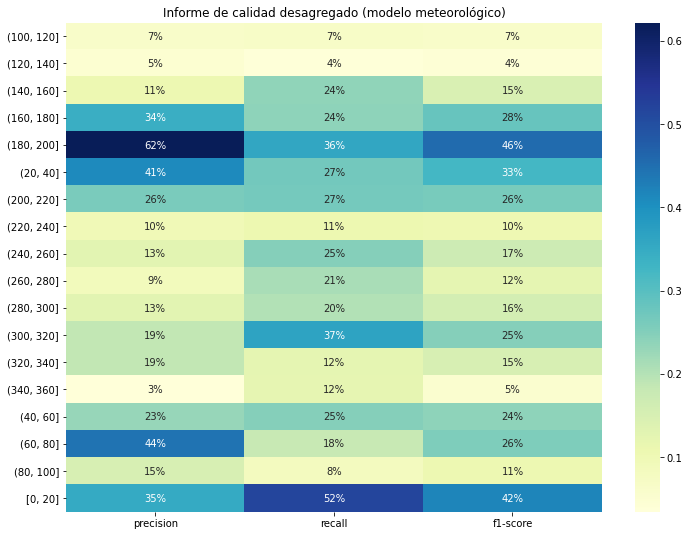

In [34]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Informe de calidad desagregado (modelo meteorológico)")

df_novar = df_all1k.drop(df_all1k[df_all1k.dir_udr_l == "variable" ].index)
cr = pd.DataFrame(classification_report(df_novar.dir_udr_l, df_novar.dir0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');

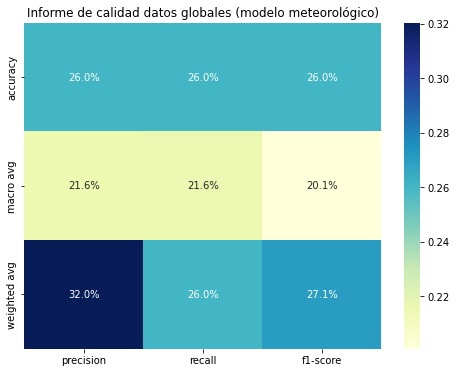

In [35]:
plt.figure(figsize=(8, 6))
plt.title("Informe de calidad datos globales (modelo meteorológico)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

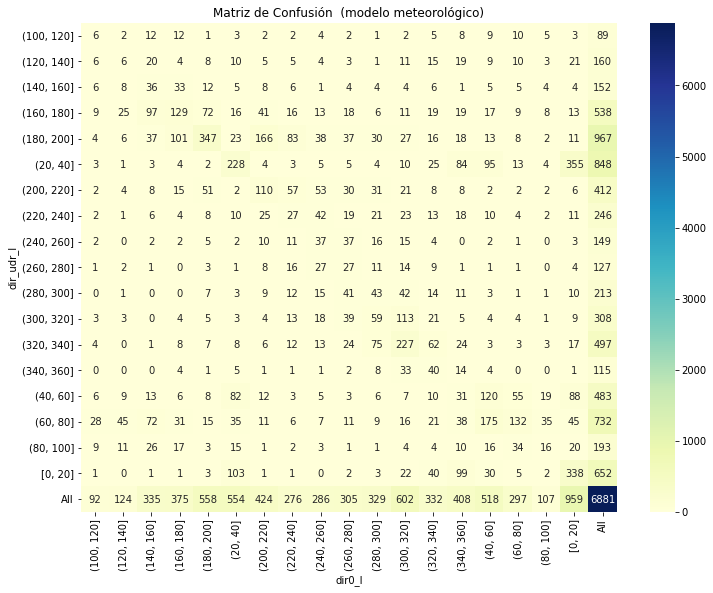

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Matriz de Confusión  (modelo meteorológico)")
global_sc=pd.crosstab(df_novar.dir_udr_l, df_novar.dir0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

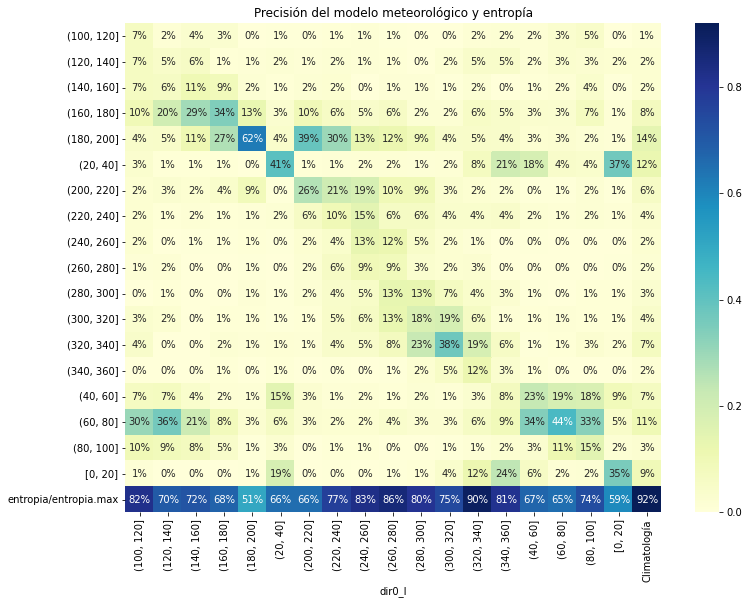

In [37]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Precisión del modelo meteorológico y entropía")
column_sc=pd.crosstab(df_novar.dir_udr_l, df_novar.dir0_l, margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropia/entropia.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatología"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**Export machine learning d2**

In [38]:
# target variable
Y = df_all1k.dir_udr_l

# independent variables drop dir0_l and 
x_var = ['dir0',  'mod0', 'wind_gust0', 'temp0', 'rh0', 'visibility0', 'lhflx0',
     'lwflx0', 'conv_prec0', 'prec0', 'swflx0','shflx0', 'cape0', 'cin0', 'cfh0',
     'cfl0', 'cfm0', 'cft0', 'HGT5000','T5000', 'T8500', 'dir1','mod1', 'wind_gust1',
     'mslp1','temp1', 'rh1', 'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1',
     'prec1', 'swflx1', 'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1',
     'cft1', 'dir2', 'mod2', 'wind_gust2','temp2', 'rh2', 'visibility2', 'lhflx2',
     'lwflx2', 'conv_prec2','prec2', 'swflx2', 'shflx2', 'cape2', 'cin2', 'cfh2',
     'cfl2', 'cfm2','cft2', 'dir3', 'snow_prec3', 'mod3', 'wind_gust3', 'rh3',
     'visibility3', 'lhflx3', 'lwflx3', 'conv_prec3', 'prec3', 'swflx3',
     'shflx3', 'cape3', 'cin3', 'cfh3', 'cfl3', 'cfm3', 'cft3']
X = df_all1k[x_var]

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=1)
ml_model = LGBMClassifier(n_estimators=150).fit(X_train,y_train)

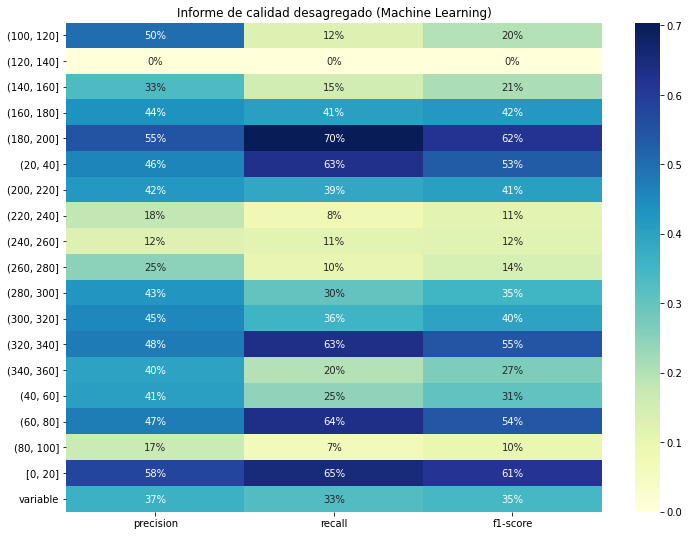

In [40]:
cr = pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
plt.figure(figsize=(12, 9))
plt.title("Informe de calidad desagregado (Machine Learning)")
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');

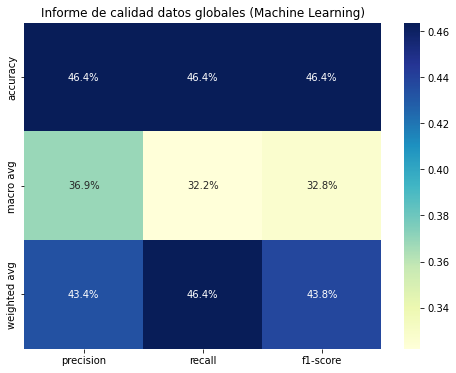

In [41]:
plt.figure(figsize=(8, 6))
plt.title("Informe de calidad datos globales (Machine Learning)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

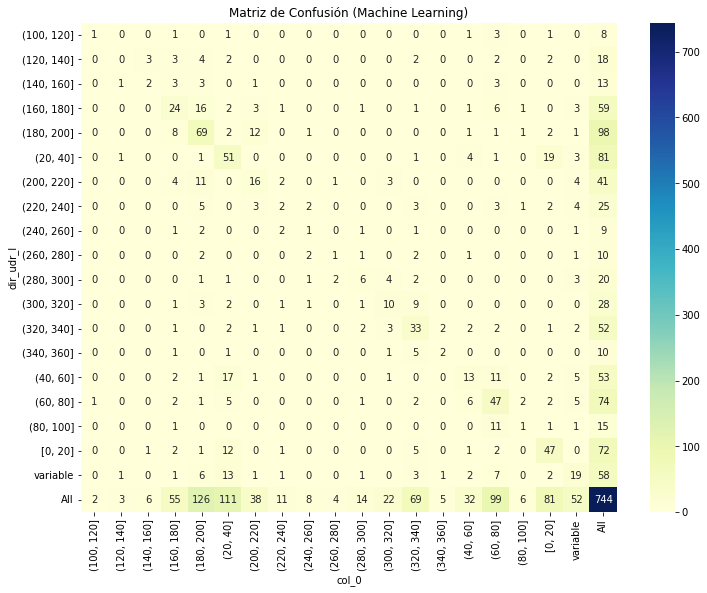

In [42]:
plt.figure(figsize=(12, 9))
plt.title("Matriz de Confusión (Machine Learning)")
import seaborn as sns
global_sc=pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

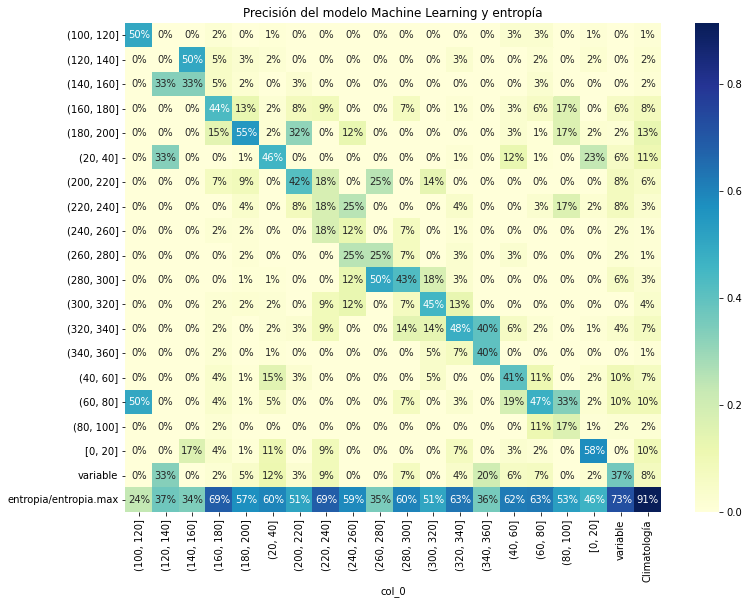

In [43]:
import math
from scipy.stats import entropy

plt.figure(figsize=(12, 9))
plt.title("Precisión del modelo Machine Learning y entropía")
column_sc=pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropia/entropia.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatología"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

In [30]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)

al_file={"coor":coor,"x_var":x_var,"pipe":pipe}
pickle.dump(al_file, open("dir_UDR_d2.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=150))])
